# Projet d'Analyse Boursière

### Remarque: Vous êtes libre de considérer ceci comme un exercice complet ou simplement de voir la vidéo des solutions comme une revue de code pour le projet. Ce projet est conçu pour être assez stimulant car il introduira quelques nouveaux concepts par le biais de quelques astuces !

Bienvenue à votre premier projet! Ce projet est destiné à couronner la première moitié du cours, qui a principalement porté sur l'apprentissage des bibliothèques que nous utilisons dans ce cours, la deuxième moitié du cours traitera beaucoup plus des techniques financières et des plateformes de trading quantitatif.

Nous analyserons les données sur les actions de quelques compagnies automobiles du 1er janvier 2012 au 1er janvier 2017. Gardez à l'esprit que ce projet est principalement fait pour pratiquer vos compétences avec matplotlib, pandas et numpy. Ne déduisez pas des conseils de trading financier de l'analyse que nous faisons ici !

### Partie 0: Importations

**Importez les différentes bibliothèques dont vous aurez besoin - vous pouvez toujours revenir ici ou importer au fur et à mesure :)**

In [411]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

In [371]:
import mplfinance as mpf

____
## Partie 1: Obtenir les données

### Action Tesla (Ticker: TSLA sur le NASDAQ)

**Note ! Tout le monde ne travaillera pas sur un ordinateur qui lui donnera un accès complet pour télécharger les informations boursières en utilisant pandas_datareader (pare-feu, permissions d'administration, etc...). Pour cette raison, le fichier csv pour Tesla est fourni dans un dossier data à l'intérieur de ce dossier. Il s'appelle Tesla_Stock.csv. N'hésitez pas à l'utiliser avec read_csv !**

**Utilisez pandas_datareader pour obtenir les informations historiques sur les actions de Tesla du 1er janvier 2012 au 1er janvier 2017.**



In [372]:
data_tesla= pd.read_csv('Tesla_Stock.csv')
data_tesla['Date']=pd.to_datetime(data_tesla['Date'])
data_tesla = data_tesla.set_index('Date')

In [373]:
data_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


### Autres entreprises automobiles

**Répétez les mêmes étapes pour extraire les données pour Ford et GM (General Motors)**

In [374]:
data_ford = pd.read_csv('Ford_Stock.csv')
data_ford['Date']=pd.to_datetime(data_ford['Date'])
data_ford = data_ford.set_index('Date')
data_ford.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [375]:
data_gm = pd.read_csv('GM_Stock.csv')
data_gm['Date']=pd.to_datetime(data_gm['Date'])
data_gm = data_gm.set_index('Date')

In [376]:
data_gm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,35.869999,35.540001,35.830002,35.689999,9351200.0,30.899082
2016-12-27,35.930000,35.500000,35.799999,35.540001,6008700.0,30.769215
2016-12-28,35.799999,35.130001,35.740002,35.150002,8451900.0,30.431576
2016-12-29,35.480000,35.119999,35.250000,35.139999,4416700.0,30.422913
2016-12-30,35.310001,34.669998,35.209999,34.840000,7646100.0,30.163183


## Partie 2: Visualisation des données

**Il est temps de visualiser les données.**

**Suivez et recréez les graphiques ci-dessous en suivant les instructions et les explications.**

____

**Recréez ce tracé linéaire de tous les prix à l'ouverture des différentes actions! Astuce: Pour la légende, utilisez le paramètre label et plt.legend()**

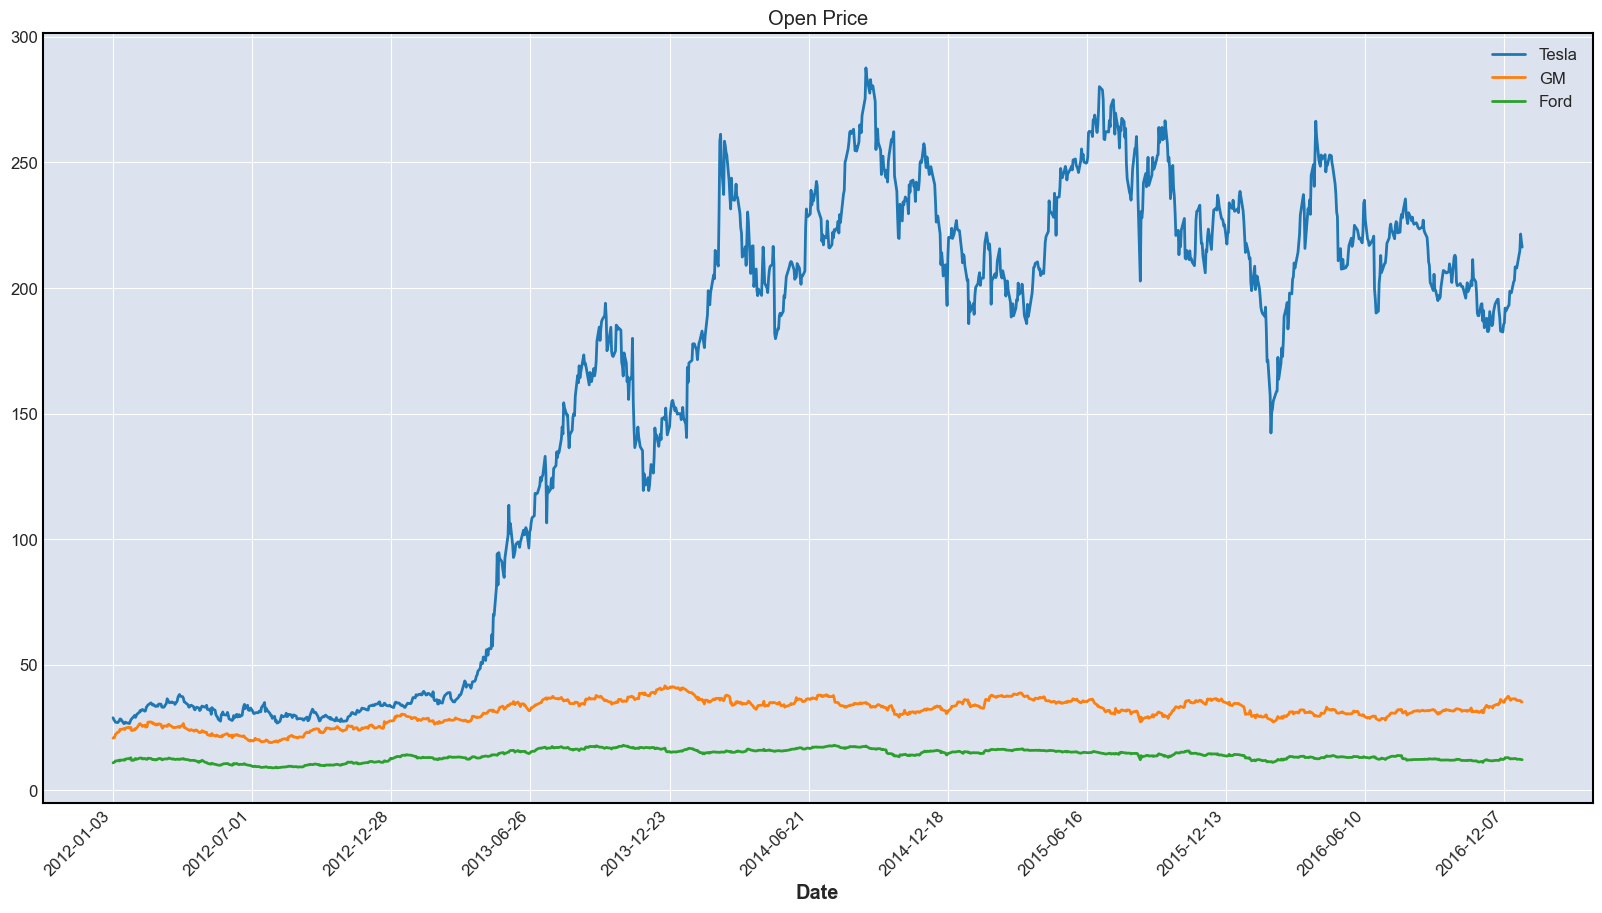

In [377]:
#data_tesla['Date']=pd.to_datetime(data_tesla['Date'])
#data_ford['Date']=pd.to_datetime(data_ford['Date'])
#data_gm['Date']=pd.to_datetime(data_gm['Date'])
#start_date = data_tesla['Date'][0]
#end_date = data_tesla['Date'][1257]
a=pd.to_datetime(data_tesla.index[0])
b=pd.to_datetime(data_tesla.index[-1])
date_list = np.arange(a, b, timedelta(days=180)).astype(datetime)

plt.figure(figsize=(20,10))

plt.plot(data_tesla['Open'] , label = 'Tesla')
plt.plot(data_gm['Open'] , label = 'GM')
plt.plot(data_ford['Open'] , label = 'Ford')
plt.title('Open Price')
plt.legend()
plt.xticks(date_list, rotation = 45 , ha = 'right')
plt.xlabel('Date')

plt.show()


**Tracez le volume des actions négociées chaque jour.**

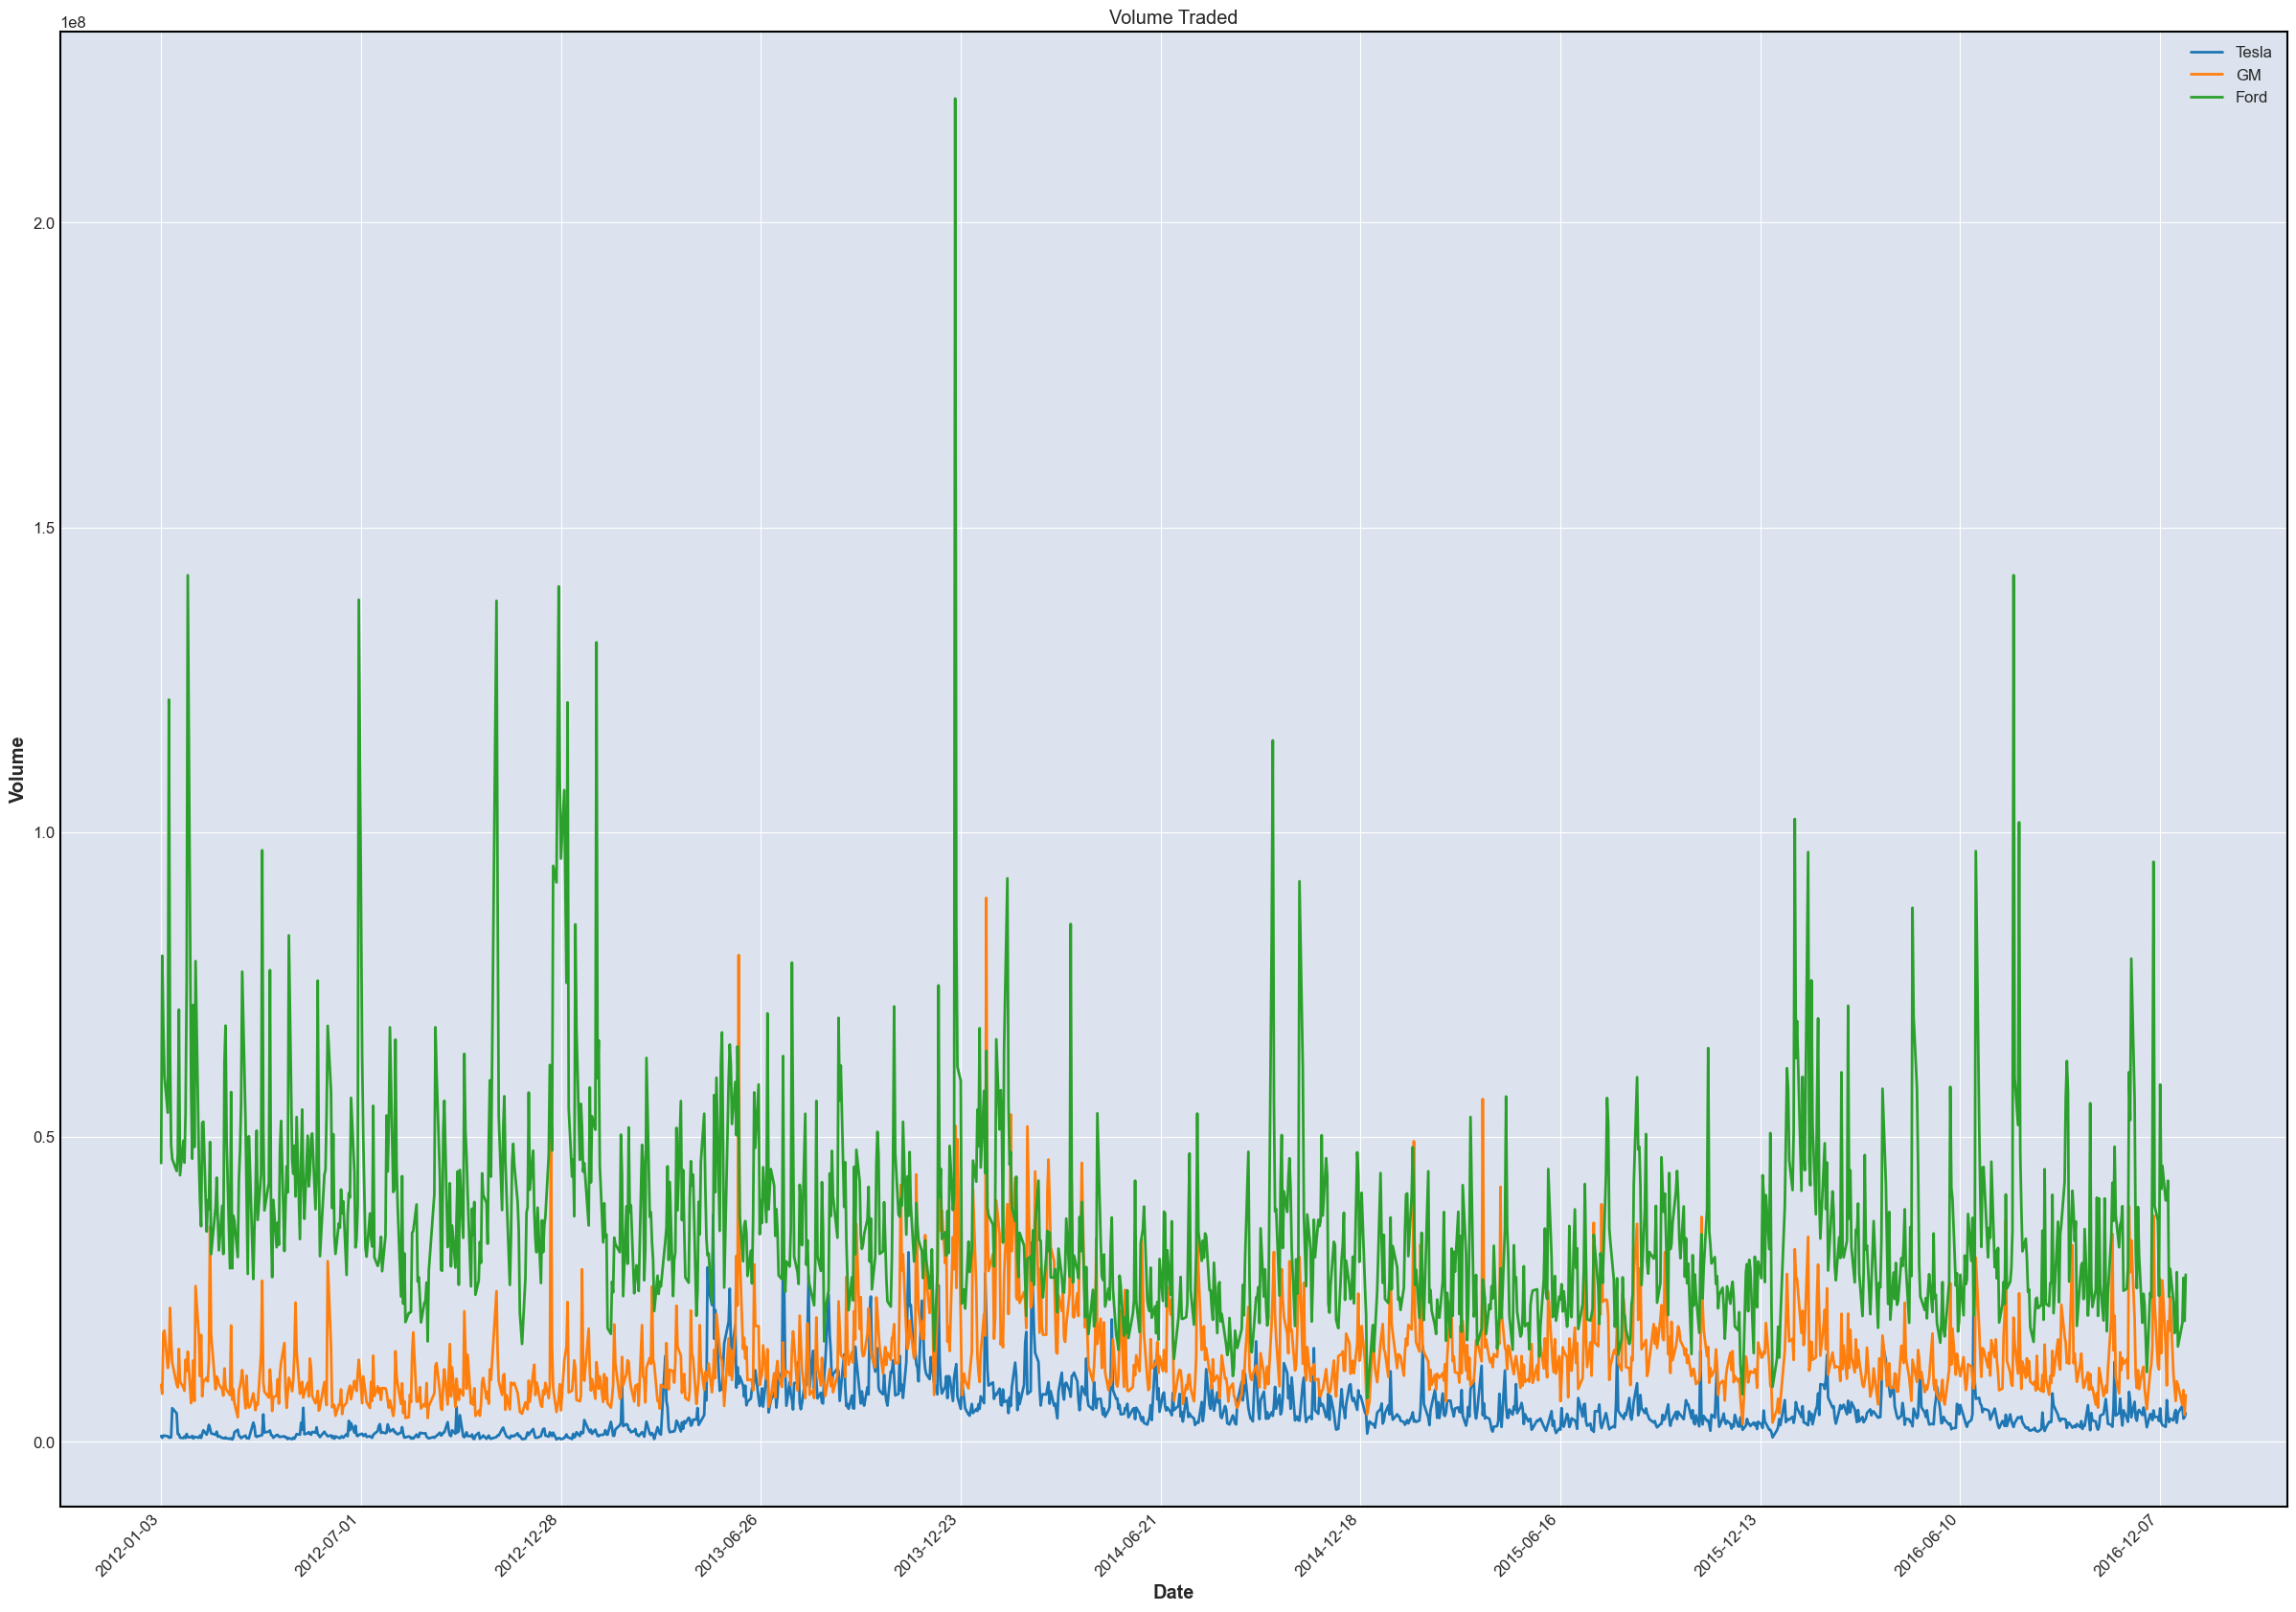

In [378]:
plt.figure(figsize=(30,20))

plt.plot(data_tesla['Volume'] , label = 'Tesla')
plt.plot(data_gm['Volume'] , label = 'GM')
plt.plot(data_ford['Volume'] , label = 'Ford')
plt.title('Volume Traded')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(date_list, rotation = 45 , ha = 'right')


plt.show()


**Intéressant, il semble que Ford ait eu un très gros pic fin 2013. Quelle était la date de ce volume d'échange maximum pour Ford ?**

**Bonus: Que s'est-il passé ce jour-là?**

In [379]:
#print(max(data_ford['Volume']))

#indice_ligne = data_ford.index[data_ford['Volume'] == 220363000.0].get_loc('220363000.0')

index_max_value = data_ford['Volume'].idxmax()
print(index_max_value)

#date_ford_max_vol = data_ford[index_max_value]

#print('La date en laquelle le volulme de Ford a été le plus haut est : ' , date_ford_max_vol)

2013-12-18 00:00:00


____

*La visualisation du prix à l'ouverture des séries temporelles donne l'impression que Tesla a toujours eu beaucoup plus de valeur en tant qu'entreprise que GM et Ford. Mais pour vraiment comprendre cela, il faudrait regarder la capitalisation boursière totale de la société, et pas seulement le cours de l'action. Malheureusement, nos données actuelles n'ont pas cette information du nombre total d'unités d'actions présentes. Mais ce que nous pouvons faire comme simple calcul pour essayer de représenter l'argent total échangé serait de multiplier la colonne 'Volume' par le cours de l'action. Rappelez-vous que ce n'est pas encore la capitalisation boursière réelle, c'est juste une représentation visuelle de la quantité totale d'argent échangé en utilisant la série temporelle. (par exemple 100 unités d'actions à 10 dollars chacune contre 100 000 unités d'actions à 1 dollars chacune)*

**Créez une nouvelle colonne pour chaque dataframe appelée "Total Traded" qui est le prix d'ouverture multiplié par le volume négocié.**

In [380]:
def test (df):
    df['Total_Traded'] = df['Volume']*df['Open']
    print(df)
    return df
data_tesla = test(data_tesla)
data_gm = test(data_gm)
data_ford = test(data_ford)


                  High         Low        Open       Close   Volume  \
Date                                                                  
2012-01-03   29.500000   27.650000   28.940001   28.080000   928100   
2012-01-04   28.670000   27.500000   28.209999   27.709999   630100   
2012-01-05   27.930000   26.850000   27.760000   27.120001  1005500   
2012-01-06   27.790001   26.410000   27.200001   26.910000   986300   
2012-01-09   27.490000   26.120001   27.000000   27.250000   897000   
...                ...         ...         ...         ...      ...   
2016-12-23  213.449997  207.710007  208.000000  213.339996  4670500   
2016-12-27  222.250000  214.419998  214.880005  219.529999  5915700   
2016-12-28  223.800003  217.199997  221.529999  219.740005  3782500   
2016-12-29  219.199997  214.119995  218.559998  214.679993  4045000   
2016-12-30  217.500000  211.679993  216.300003  213.690002  4642600   

             Adj Close  Total_Traded  
Date                                 

**Tracez ce total négocié (Total Traded) par rapport à l'index de temps.**

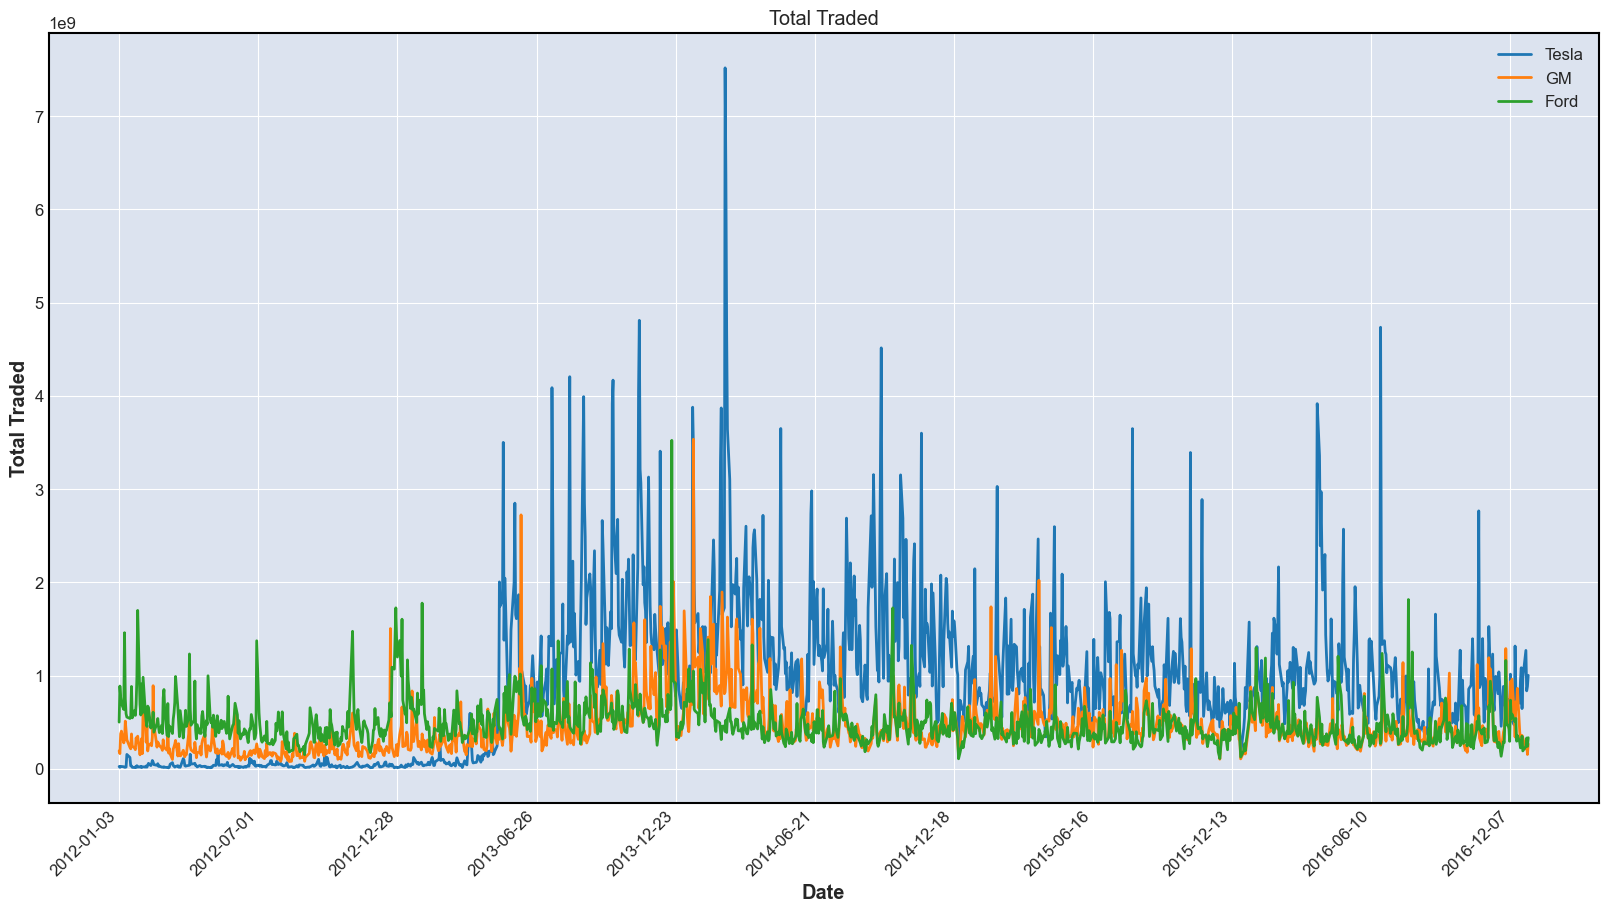

In [381]:
plt.figure(figsize=(20,10))

plt.plot(data_tesla['Total_Traded'] , label = 'Tesla')
plt.plot(data_gm['Total_Traded'] , label = 'GM')
plt.plot(data_ford['Total_Traded'] , label = 'Ford')
plt.title('Total Traded')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.xticks(date_list, rotation = 45 , ha = 'right');

**Intéressant, il semble qu'il y ait eu une énorme quantité d'argent échangé pour Tesla début 2014. Quelle date c'était et que s'est-il passé ?**

In [382]:
index_max_value = data_tesla['Total_Traded'].idxmax()
print(index_max_value)

2014-02-25 00:00:00


____

**Entraînons-nous à tracer des moyennes glissantes ou mobiles (MA - Moving Averages). Tracez MA50 et MA200 pour GM.**

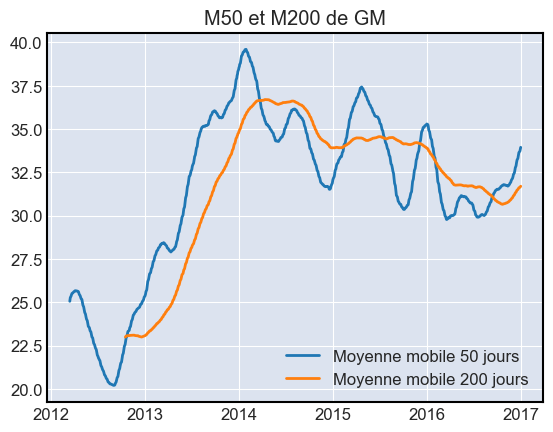

In [383]:
MM=pd.DataFrame()

MM['Moyenne_Mobile_50'] = data_gm['Open'].rolling(window=50).mean()
MM['Moyenne_Mobile_200'] = data_gm['Open'].rolling(window=200).mean()


plt.plot(MM['Moyenne_Mobile_50'] , label = 'Moyenne mobile 50 jours')
plt.plot(MM['Moyenne_Mobile_200'] , label = 'Moyenne mobile 200 jours')

plt.title('M50 et M200 de GM')
plt.legend()

plt.show()

______

**Enfin, voyons s'il existe une relation entre ces actions car elles sont tous liées à l'industrie automobile. Nous pouvons le voir facilement à travers un diagramme de dispersion. Importez la matrice de dispersion de pandas.plotting et utilisez-la pour créer un diagramme de dispersion du prix d'ouverture de toutes les actions. Vous devrez peut-être réorganiser les colonnes dans un nouveau dataframe unique. Vous trouverez des conseils et des informations ici: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot**

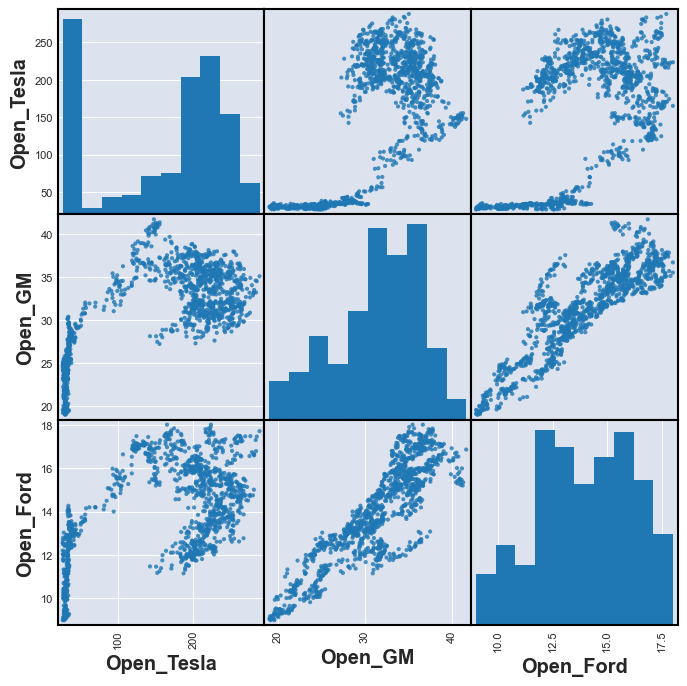

In [384]:
new_df_1 = pd.merge(pd.merge(data_tesla['Open'], data_gm['Open'] , left_index=True , right_index = True),data_ford['Open'], left_index=True , right_index = True)
new_df_1 = new_df_1.rename(columns={'Open_x':'Open_Tesla' , 'Open_y':'Open_GM' , 'Open':'Open_Ford'})

scatter_matrix(new_df_1 , alpha=0.8 , figsize=(8,8) );

_____
### Bonus: Tâche de visualisation ! (C'est difficile !)
**Créons maintenant un graphique en chandelier! Regardez la vidéo si vous ne parvenez pas à recréer cette visualisation, il y a plusieurs étapes à suivre! Référez-vous à la vidéo pour comprendre comment interpréter et lire ce graphique. Conseils: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

**Créer un graphique de chandeliers pour Ford en janvier 2012 (trop de dates, ce ne sera pas idéal pour un graphique en chandelier)**

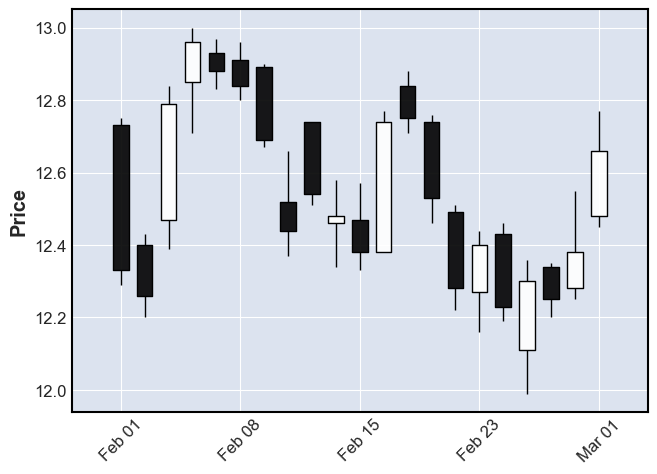

In [385]:
new_df_2 = pd.merge(pd.merge(pd.merge(data_ford['Open'] ,data_ford['Close'], left_index=True , right_index = True), data_ford['High'], left_index=True , right_index = True), data_ford['Low'], left_index=True , right_index = True)
new_df_2 = new_df_2.loc['2012-02-01':'2012-03-01']
mpf.plot(new_df_2, type='candle')

____
# Partie 3: Analyse financière de base

Il est maintenant temps de se concentrer sur quelques calculs financiers clés. Cela vous servira de transition vers la deuxième moitié du cours. Vous n'avez qu'à suivre les instructions, il s'agira principalement d'un exercice de conversion d'une équation ou d'un concept mathématique en code à l'aide de python et pandas, ce que nous ferons souvent lorsque nous travaillerons avec des données quantitatives! Si vous vous sentez perdu dans cette section, ne vous inquiétez pas! Allez simplement au notebook (ou vidéo) sur les solutions et traitez-la comme une revue de code, utilisez le style d'apprentissage qui vous convient le mieux!

Commençons !
____

## Rendement quotidien en pourcentage
Nous commencerons par calculer la rendement quotidienne en pourcentage. Le rendement (en %) est défini par la formule suivante :

$ r_t = \frac{p_t}{p_{t-1}} -1$

Cela définit r_t (rendement à l'instant t) comme étant égal au prix à l'instant t divisé par le prix à l'instant t-1 (la veille) moins 1. En gros, cela vous informe simplement de votre pourcentage de gain (ou de perte) si vous avez acheté l'action le jour et l'avez ensuite vendue le lendemain. Bien que cela ne soit pas nécessairement utile pour tenter de prédire les valeurs futures du titre, c'est très utile pour analyser la volatilité du titre. Si les rendements quotidiens ont une large distribution, le titre est plus volatil d'un jour à l'autre. Calculons les pourcentages de rendement, puis traçons un histogramme et décidons quel titre est le plus stable!

**Créez une nouvelle colonne pour chaque dataframe appelée 'returns'. Cette colonne sera calculée à partir de la colonne de prix à la fermeture'Close'. Il y a deux façons de faire cela, soit un simple calcul en utilisant la méthode .shift() qui suit la formule ci-dessus, ou vous pouvez aussi utiliser la méthode pct_change intégrée à pandas.**

In [386]:
def returns (df): 
    df['Returns_shift'] = (df['Close'] / df['Close'].shift(1)) - 1
    print(df)
    return(df)

data_tesla = returns(data_tesla)
data_gm = returns(data_gm)
data_ford = returns(data_ford)


                  High         Low        Open       Close   Volume  \
Date                                                                  
2012-01-03   29.500000   27.650000   28.940001   28.080000   928100   
2012-01-04   28.670000   27.500000   28.209999   27.709999   630100   
2012-01-05   27.930000   26.850000   27.760000   27.120001  1005500   
2012-01-06   27.790001   26.410000   27.200001   26.910000   986300   
2012-01-09   27.490000   26.120001   27.000000   27.250000   897000   
...                ...         ...         ...         ...      ...   
2016-12-23  213.449997  207.710007  208.000000  213.339996  4670500   
2016-12-27  222.250000  214.419998  214.880005  219.529999  5915700   
2016-12-28  223.800003  217.199997  221.529999  219.740005  3782500   
2016-12-29  219.199997  214.119995  218.559998  214.679993  4045000   
2016-12-30  217.500000  211.679993  216.300003  213.690002  4642600   

             Adj Close  Total_Traded  Returns_shift  
Date                  

In [387]:
# méthode 2: en utilisant pct_changes

In [393]:
data_tesla['Returns_pct'] = data_tesla['Close'].pct_change()
data_gm['Returns_pct'] = data_gm['Close'].pct_change()
data_ford['Returns_pct'] = data_ford['Close'].pct_change()

data_gm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   High           1258 non-null   float64
 1   Low            1258 non-null   float64
 2   Open           1258 non-null   float64
 3   Close          1258 non-null   float64
 4   Volume         1258 non-null   float64
 5   Adj Close      1258 non-null   float64
 6   Total_Traded   1258 non-null   float64
 7   Returns_shift  1257 non-null   float64
 8   Returns_pct    1257 non-null   float64
dtypes: float64(9)
memory usage: 130.6 KB


**Maintenant, tracez un histogramme des rendements de chaque entreprise. Soit vous les faites séparément, soit vous les empilez les uns sur les autres. Quelle est l'action la plus "volatile"? (selon la variance des rendements quotidiens, nous discuterons de la volatilité de façon beaucoup plus détaillée dans les prochaines sections).**

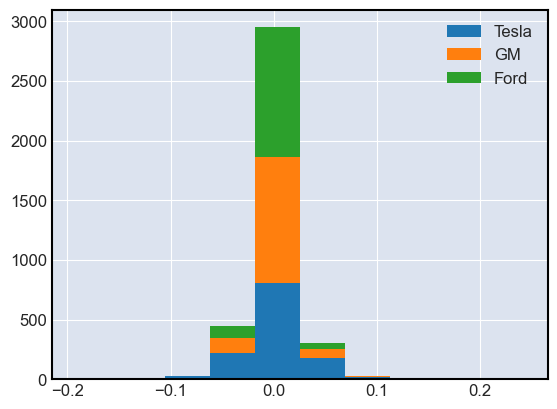

In [389]:
#plt.figure(figsize=(20,10))
plt.hist([data_tesla['Returns_pct'] , data_gm['Returns_pct'] , data_ford['Returns_pct']] , label = ['Tesla','GM','Ford'] , stacked=True)

plt.legend()
plt.show()

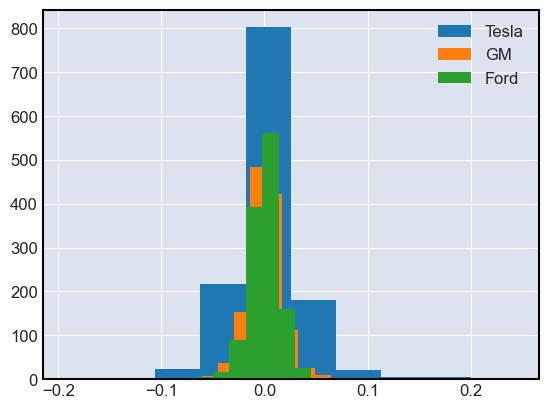

In [390]:
plt.hist(data_tesla['Returns_pct'], label = 'Tesla')
plt.hist(data_gm['Returns_pct'] , label='GM')
plt.hist(data_ford['Returns_pct'] , label='Ford');
plt.legend()
plt.show()

**Essayez aussi de tracer un KDE au lieu dun 'histogrammes pour avoir un autre point de vue. Quelle action a le tracé le plus large?**

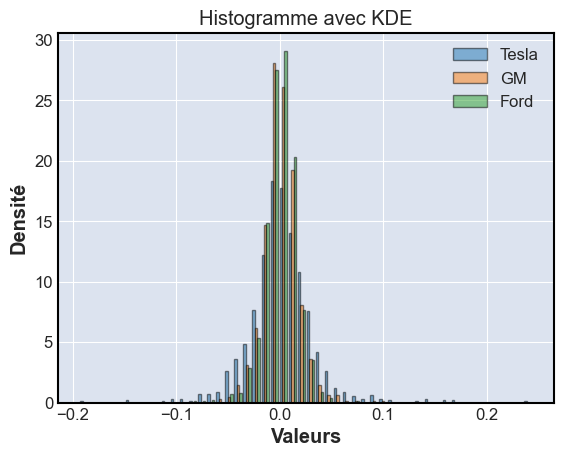

In [391]:
plt.hist([data_tesla['Returns_pct'] , data_gm['Returns_pct'] , data_ford['Returns_pct']], bins=50, density=True, label=['Tesla','GM','Ford'] ,alpha=0.5, edgecolor='black')
plt.title('Histogramme avec KDE')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()

**Essayez aussi de créer des diagrammes en boîtes comparant les rendements.**

In [407]:
data_tesla=data_tesla.dropna()
data_ford = data_ford.dropna()
data_gm = data_gm.dropna()

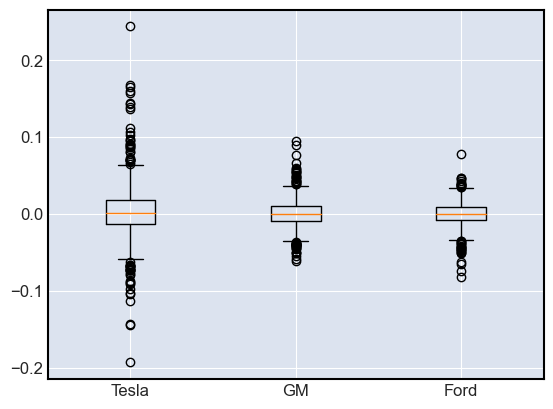

In [409]:
plt.boxplot([data_tesla['Returns_shift'],data_gm['Returns_pct'] , data_ford['Returns_pct']], labels=['Tesla','GM','Ford'] );


## Comparaison des rendements quotidiens entre les actions

**Créez un graphique matriciel de dispersion pour voir la corrélation entre les rendements quotidiens de chaque titre. Cela permet de répondre à la question de savoir dans quelle mesure les sociétés automobiles sont liées entre elles. Le marché considère-t-il Tesla comme une entreprise de technologie plutôt que comme une entreprise automobile ?**

/Users/mathi2s/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


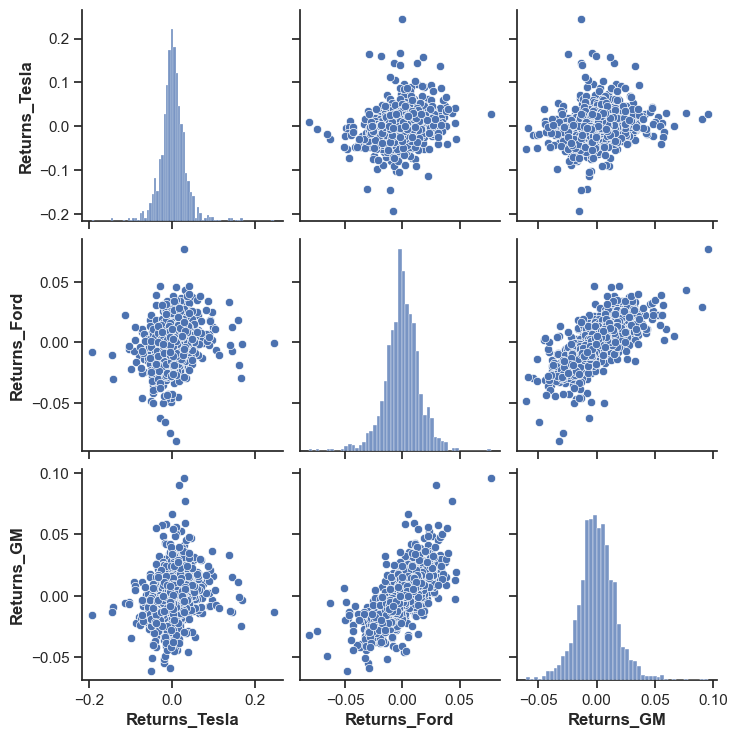

In [419]:
data_matrice = pd.merge(pd.merge(data_tesla['Returns_pct'] ,data_ford['Returns_pct'], left_index=True , right_index = True), data_gm['Returns_pct'], left_index=True , right_index = True)
data_matrice = data_matrice.rename(columns={'Returns_pct':'Returns_GM' , 'Returns_pct_y':'Returns_Ford' , 'Returns_pct_x':'Returns_Tesla'})
sns.set(style='ticks')
sns.pairplot(data_matrice)

**Il semble que Ford et GM aient une sorte de relation, traçons juste ces deux-là dans un diagramme de dispersion pour voir cela de plus près !**

Text(0.5, 1.0, 'diagramme de dispersion')

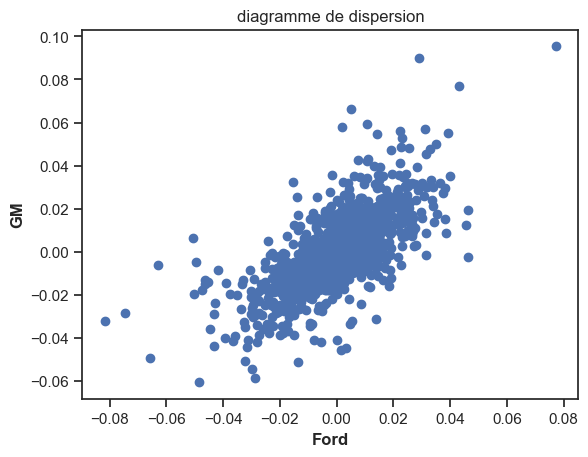

In [421]:
plt.scatter(data_ford['Returns_pct'], data_gm['Returns_pct'])
plt.xlabel('Ford')
plt.ylabel('GM')
plt.title('diagramme de dispersion')

____
## Rendements quotidiens cumulatifs

Super ! Nous pouvons maintenant voir quel titre a eu le plus grand écart de rendement quotidien (vous auriez dû vous rendre compte que c'était Tesla, notre graphique original du cours de l'action aurait dû aussi le montrer).

Avec les rendements cumulatifs quotidiens, la question à laquelle nous essayons de répondre est la suivante: si j'avais investi 1$ dans l'entreprise au début de la série temporelle, combien vaudrait-elle aujourd'hui? Cette question est différente de celle du prix de l'action à la journée courante, car elle tiendra compte des rendements quotidiens. N'oubliez pas que notre simple calcul ici ne tiendra pas compte des actions qui redonnent un dividende. Examinons quelques exemples simples:

Disons qu'il y a une action "ABC" qui est activement négociée en bourse. ABC a les prix suivants correspondant aux dates indiquées:

    Date                        Prix
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Rendement quotidien**: Le rendement quotidien est le profit ou perte réalisé par l'action par rapport à la veille. (C'est ce qu'on vient de calculer ci-dessus). Une valeur supérieure à 1 indique un profit, de même qu'une valeur inférieure à 1 indique une perte. Il est également exprimé en pourcentage pour mieux transmettre l'information. (Exprimé en pourcentage, si la valeur est supérieure à 0, le titre vous a donné un profit, sinon une perte). Ainsi, pour l'exemple ci-dessus, les rendements quotidiens seraient

    Date                 Rendement quotidien      %Rendement quotidien
    01/01/2018               10/10 =  1                      -   
    01/02/2018               15/10 =  3/2                    50%
    01/03/2018               20/15 =  4/3                    33%
    01/04/2018               25/20 =  5/4                    20%

**Rendement Cumulé**: Bien que les rendements quotidiens soient utiles, ils ne donnent pas à l'investisseur un aperçu immédiat des gains qu'il a réalisés jusqu'à présent, surtout si le titre est très volatil. Le rendement cumulatif est calculé par rapport au jour où l'investissement est effectué.  Si le rendement cumulatif est supérieur à 1, vous faites des profits, sinon vous êtes en perte. Donc, pour l'exemple ci-dessus, les gains cumulatifs sont les suivants:

    Date                Rendement cumulé         %rendement cumulé
    01/01/2018              10/10 =  1               100 %   
    01/02/2018              15/10 =  3/2             150 %
    01/03/2018              20/10 =  2               200 %
    01/04/2018              25/10 =  5/2             250 %

La formule pour un rendement quotidien cumulatif est la suivante :

$ i_i = (1+r_t) * i_{t-1} $

Ici, nous pouvons voir que nous ne faisons que multiplier notre investissement précédent à i à t-1 par 1+notre pourcentage de rendement. Pandas rend cela très simple à calculer avec sa méthode cumprod(). En utilisant quelque chose de la manière suivante :

    df[daily_cumulative_return] = (1 + df[pct_daily_return]).cumprod()
    

**Créez une colonne de rendement quotidien cumulatif (cumulative daily return) pour le dataframe de chaque société automobile.**

In [426]:
def cumulative_return (df):
    df['Cumulative_return'] = (1+ df['Returns_shift']).cumprod()
    return(df)

data_tesla = cumulative_return(data_tesla)
data_gm = cumulative_return(data_gm)
data_ford = cumulative_return(data_ford)

### **Tracez maintenant les colonnes de rendement cumulatif en fonction de l'index de la série temporelle. Quel titre a affiché le rendement le plus élevé pour un dollar investi? Lequel a affiché le rendement le plus faible?**

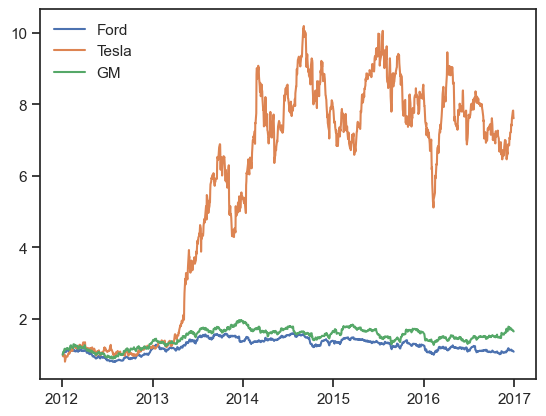

In [432]:
plt.plot(data_ford['Cumulative_return'], label='Ford')
plt.plot(data_tesla['Cumulative_return'] , label='Tesla')
plt.plot(data_gm['Cumulative_return'] , label = 'GM')
plt.legend()
plt.show()

# Bon travail!

Voilà pour l'analyse de base, qui conclut cette moitié du cours, beaucoup plus axée sur l'apprentissage des outils du métier. La deuxième moitié du cours est celle où nous nous plongerons vraiment dans les fonctionnalités conçues pour les séries temporelles, l'analyse quantitative, le trading algorithmique, et bien plus encore!